Change in WC per year [200, -100, 350]

          FCF    FCFE  Interest_expenses  Dividends & Share_repurchase
Year                                                                  
2020  3994.45  2290.0                353                          1100
2021  6860.00  8600.0                400                          1202
2022  9942.50  9250.0                450                          1503
      Interest Coverage  Dividend Coverage
Year                                      
2020              11.32               2.08
2021              17.15               7.15
2022              22.09               6.15


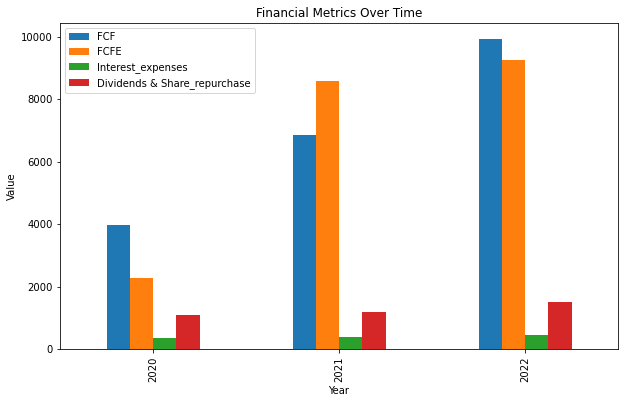

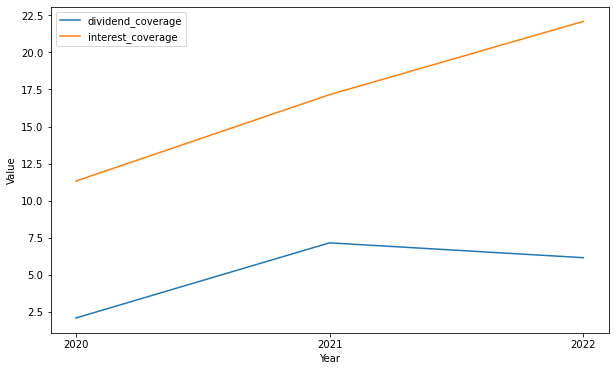

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


years = [2020, 2021, 2022]
tax_rate = 0.35
net_income = [4844, 5500, 6000]
depr = [1500, 2000, 2500]
int_exp = [353,400, 450]
inventory = [150 , 300, 350, 500]
accounts_payable = [200, 300, 500, 400 ]
accounts_receivable = [100, 250, 300, 400 ]
capex = [2379, 1000, -1500 ]
borrowings = [-1475, 2000, -400 ]
dividends = [1100, 1200, 1500]
share_repurchase = [0, 2, 3]

def change_in_wc():
    years_wc = [2019,2020,2021,2022]
    change_in_nwc_p_y = []
    previous_y_nwc = []
    for i in range(len(years_wc)):
        calculation = inventory[i] + accounts_receivable[i] - accounts_payable[i]
        previous_y_nwc.append(calculation)
        if i > 0: 
            change_in_nwc_p_y.append(calculation - previous_y_nwc[i -1])
    return change_in_nwc_p_y

WC = change_in_wc()
print("Change in WC per year" , WC)
print()


def free_cash_flow_to_firm(WC):
    FCFF_per_year = []
    for ni, de, inter, wc , cpx in zip(net_income, depr, int_exp, WC, capex):
        calculation = ni + de + (inter * (1 - tax_rate)) - wc - cpx
        FCFF_per_year.append(calculation)
    return FCFF_per_year

FCFF = free_cash_flow_to_firm(WC)


def free_cash_flow_to_equity(free_cash_flow_to_firm):
    FCFE_per_year = [] 
    for i in range(len(free_cash_flow_to_firm)):
        calculation = free_cash_flow_to_firm[i] - (int_exp [i] * (1 - tax_rate)) + borrowings [i]
        FCFE_per_year.append(calculation)
    return FCFE_per_year

FCFE = free_cash_flow_to_equity(FCFF)


def interest_coverage(free_cash_flow_to_firm):
    Int_coverage_per_y = []
    for i in range(len(free_cash_flow_to_firm)):
        calculation = free_cash_flow_to_firm[i] / int_exp[i]
        Int_coverage_per_y.append(calculation)
    return Int_coverage_per_y

Int_cov = interest_coverage(FCFF)

def dividend_coverage(free_cash_flow_to_equity):
    Div_coverage_per_y = []
    for i in range(len(free_cash_flow_to_equity)):
        divisor = dividends[i] + share_repurchase[i]
        calculation = free_cash_flow_to_equity[i] / divisor if divisor != 0 else 0
        Div_coverage_per_y.append(calculation)
    return Div_coverage_per_y

Div_cov = dividend_coverage(FCFE)




# Pandas Table for FCF & FCFE
table = pd.DataFrame({"Year": years, "FCF": FCFF, "FCFE": FCFE, "Interest_expenses": int_exp, "Dividends & Share_repurchase": [d + s for d, s in zip(dividends, share_repurchase)]})
table.set_index("Year", inplace=True)

#Pandas Table for Interest and Dividens coverages 
table_1 = pd.DataFrame({"Year": years, "Interest Coverage": Int_cov, "Dividend Coverage": Div_cov})
table_1.set_index("Year", inplace=True)
table_1["Interest Coverage"] = table_1["Interest Coverage"].round(2)
table_1["Dividend Coverage"] = table_1["Dividend Coverage"].round(2)

print(table)
print(table_1)

# FCF, FCFE Visualization
table.plot(kind = "bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Financial Metrics Over Time")
plt.legend()
plt.show()

# Dividends and Interest_coverages 
plt.figure(figsize=(10, 6))
plt.plot(table_1["Dividend Coverage"], label="dividend_coverage")
plt.plot(table_1["Interest Coverage"], label="interest_coverage")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.xticks(years)
plt.show()